In [1]:
## Boiler plate code common to many notebooks.  See the TestFilesCommonCode.ipynb for details
from __future__ import print_function
%run TestFilesCommonCode.ipynb

SimpleITK Version: 0.9.1
Compiled: Sep 28 2015 10:07:41



In [2]:
import numpy as np
import pandas as pd
from ggplot import *

In [157]:
# pure
#x = [0.7109375, 0.7041015625, 0.6923828125, 0.6728515625, 0.6796875, 0.68994140625, 0.6640625, 0.668701171875]
#y = [0.2314453125, 0.23193359375, 0.229248046875, 0.228271484375, 0.2392578125, 0.226318359375, 0.23828125, 0.23046875]

#x = [0.4, 0.4, 0.7, 0.1, 0.7, 0.1, 0.1, 0.7, 0.4]
#y = [0.3, 0.1, 0.3, 0.3, 0.1, 0.1, 0.2, 0.2, 0.5]

#x = [0, 0, 3, -3, 3, -3, -3, 3, 0]
#y = [1, -1, 1, 1, -1, -1, 0, 0, 3]

#x = [0, 0, 4, -4]
#y = [4, -4, 0, 0]

### TEST
#x=[0.125, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.425]
#y=[0.125, 0.2, 0.1, 0.25, 0.15, 0.3, 0.2, 0.275]

#x = [0.1, 0.15, 0.15, 0.3]
#y = [0.1, 0.1, 0.15, 0.3]

a = 0.3
x = [a, a, 3*a, 3*a]
y = [a, 3*a, a, 3*a]

print(x, y)
xy = np.transpose([x, y])
xy

[0.3, 0.3, 0.8999999999999999, 0.8999999999999999] [0.3, 0.8999999999999999, 0.3, 0.8999999999999999]


array([[ 0.3,  0.3],
       [ 0.3,  0.9],
       [ 0.9,  0.3],
       [ 0.9,  0.9]])

In [158]:
DF_xy = pd.DataFrame(xy)
DF_xy.rename(columns = lambda x: str(x), inplace=True)
DF_xy.rename(columns={"0": "X"}, inplace=True) # rename a dfcolumn   
DF_xy.rename(columns={"1": "Y"}, inplace=True) # rename a dfcolumn 
DF_xy

,X,Y
0,0.3,0.3
1,0.3,0.9
2,0.9,0.3
3,0.9,0.9


In [159]:
xy_mean = np.array([np.mean(x), np.mean(y)])
xy_mean.shape = [1,2]
xy_mean

array([[ 0.6,  0.6]])

In [160]:
DF_xy_mean = pd.DataFrame(xy_mean)
DF_xy_mean.rename(columns = lambda x: str(x), inplace=True)
DF_xy_mean.rename(columns={"0": "X"}, inplace=True) # rename a dfcolumn   
DF_xy_mean.rename(columns={"1": "Y"}, inplace=True) # rename a dfcolumn 
DF_xy_mean

,X,Y
0,0.6,0.6


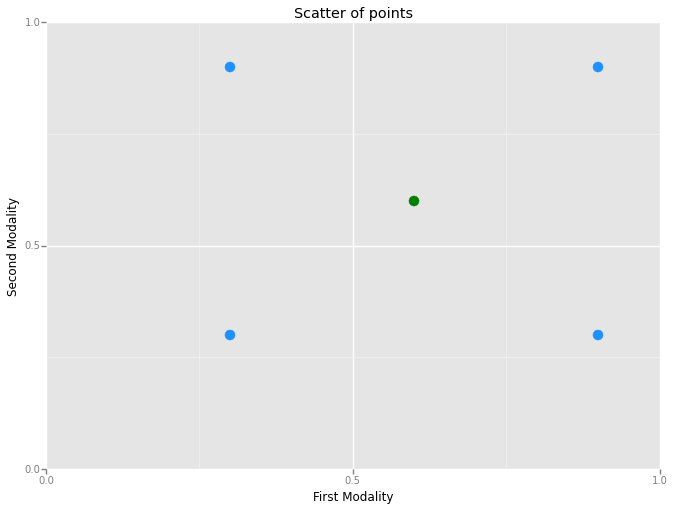

<ggplot: (296187045)>

In [161]:
ggplot(DF_xy, aes(x = 'X', y ='Y')) + \
    geom_point(alpha=1, size=100, color='dodgerblue') + \
    labs(x='First Modality', y='Second Modality', title='Scatter of points') + \
    geom_point(data = DF_xy_mean ,alpha=1, size = 100, color='green') + \
    xlim(0,1) + \
    ylim(0,1)

In [162]:
def MahalanobisDist(x, y):
    covariance_xy = np.cov(x,y, rowvar=0)
    #print(covariance_xy) # <---
    inv_covariance_xy = np.linalg.inv(covariance_xy)
    #print(inv_covariance_xy) # <---
    xy_mean = np.mean(x),np.mean(y)
    #print(xy_mean) # <---
    x_diff = np.array([x_i - xy_mean[0] for x_i in x])
    y_diff = np.array([y_i - xy_mean[1] for y_i in y])
    diff_xy = np.transpose([x_diff, y_diff])
    
    md = []
    for i in range(len(diff_xy)):
        md.append(np.sqrt(np.dot(np.dot(np.transpose(diff_xy[i]),inv_covariance_xy),diff_xy[i])))
    return md

In [163]:
MahalanobisDist(x,y)

[1.2247448713915889,
 1.2247448713915889,
 1.2247448713915889,
 1.2247448713915889]

In [164]:
MD = MahalanobisDist(x,y)
MD/max(MD)

array([ 1.,  1.,  1.,  1.])

In [165]:
def EuclideanDistanc(x,y):
    xy_mean = np.mean(x),np.mean(y)
    #print(xy_mean) # <---
    x_diff = np.array([x_i - xy_mean[0] for x_i in x])
    y_diff = np.array([y_i - xy_mean[1] for y_i in y])
    diff_xy = np.transpose([x_diff, y_diff])
    
    ed = []
    for i in range(len(diff_xy)):
        ed.append(np.sqrt(np.dot(np.transpose(diff_xy[i]),diff_xy[i])))
    return ed

In [166]:
EuclideanDistanc(x,y)

[0.42426406871192851,
 0.42426406871192845,
 0.42426406871192845,
 0.4242640687119284]

In [167]:

ED = EuclideanDistanc(x,y)
MD_norm = MD/max(MD)
ED*MD_norm

array([ 0.42426407,  0.42426407,  0.42426407,  0.42426407])

In [168]:
def RemoveOutliers(x, y):
    MD = MahalanobisDist(x, y)
    MD_norm = MD/max(MD)
    ED = EuclideanDistanc(x,y)
    Dist = ED*MD_norm
    threshold = np.mean(Dist) * 1.0 # adjust 1.5 accordingly
    print(threshold)
    threshold = 0.10
    nx, ny = [], []
    outliers = np.array([])
    for i in range(len(MD)):
        if Dist[i] >= threshold:
            nx.append(x[i])
            ny.append(y[i])
    outliers = np.transpose([nx, ny]) # position of removed pair
    return outliers

In [169]:
#print('x:', x)
#print('y:', y)
out_arr = RemoveOutliers(x,y)
print(out_arr)

0.424264068712
[[ 0.3  0.3]
 [ 0.3  0.9]
 [ 0.9  0.3]
 [ 0.9  0.9]]


In [170]:
DF_out = pd.DataFrame(out_arr)
DF_out.rename(columns = lambda x: str(x), inplace=True)
DF_out.rename(columns={"0": "X"}, inplace=True) # rename a dfcolumn   
DF_out.rename(columns={"1": "Y"}, inplace=True) # rename a dfcolumn 
DF_out

,X,Y
0,0.3,0.3
1,0.3,0.9
2,0.9,0.3
3,0.9,0.9


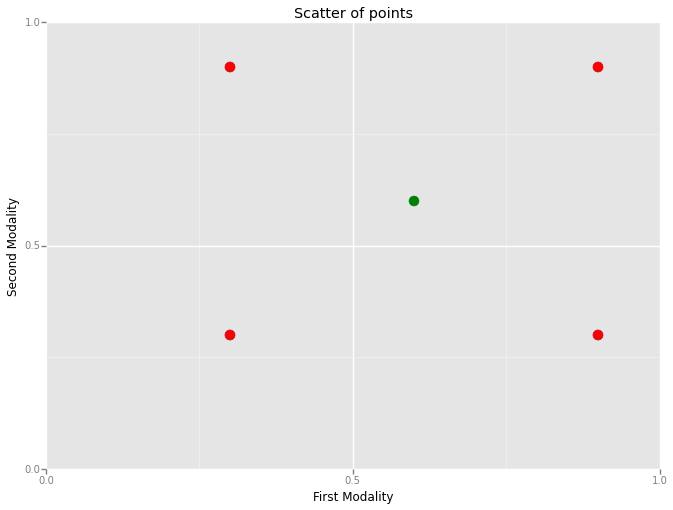

<ggplot: (296637753)>

In [172]:
ggplot(DF_xy, aes(x = 'X', y ='Y')) + \
    labs(x='First Modality', y='Second Modality', title='Scatter of points') + \
    geom_point(alpha=1, size=100, color='dodgerblue') + \
    geom_point(data = DF_out, alpha=1, size = 100, color='red') + \
    geom_point(data = DF_xy_mean ,alpha=1, size = 100, color='green') + \
    xlim(0,1) + \
    ylim(0,1)